![image.png](https://i.imgur.com/a3uAqnb.png)

# Support Vector Machines (SVM) Lab
## Teen Phone Addiction Analysis

This comprehensive notebook demonstrates the power of **Support Vector Machines (SVMs)** for both classification and regression tasks. We'll explore how SVMs work, their mathematical foundations, and how different kernels can transform data to find optimal decision boundaries.

### **📌 What We'll Cover:**

1. **SVM Fundamentals**: Understanding hyperplanes, support vectors, and margin maximization
2. **Hard vs Soft Margin**: Dealing with non-linearly separable data
3. **Kernel Methods**: Linear, Polynomial, and RBF kernels for complex decision boundaries
4. **Multi-class Classification**: One-vs-One and One-vs-All strategies
5. **Hyperparameter Tuning**: Optimizing C parameter and kernel parameters

### **🎯 Our Dataset: Teen Phone Addiction**
We'll use the same dataset that examines factors contributing to phone addiction among teenagers. This real-world problem allows us to demonstrate SVM's effectiveness on mixed data types and compare different kernel approaches.

**Why SVMs for This Dataset?**
- **High-dimensional Data**: SVMs excel with many features
- **Mixed Relationships**: Kernels can capture complex feature interactions
- **Robust to Outliers**: Maximum margin principle provides stability
- **Binary and Multi-class**: We can explore both classification approaches

## 1️⃣ Data Loading and Exploratory Analysis

Before diving into SVMs, we need to understand our data structure and prepare it for SVM analysis. This section will:

### **🔍 Key Analysis Steps:**
1. **Load and Inspect Data**: Understand the dataset structure and quality
2. **Feature Engineering**: Create both continuous and categorical targets
3. **Data Visualization**: Understand feature distributions and relationships
4. **Correlation Analysis**: Identify the most predictive features

### **📊 SVM-Specific Considerations:**
- **Feature Scaling**: SVMs are sensitive to feature scales - we'll need standardization
- **Target Creation**: Binary classification for clear SVM demonstration
- **Feature Selection**: Identify top features for 2D visualization
- **Data Quality**: Check for missing values and outliers

### **🎨 Visualization Strategy:**
We'll create visualizations that help us understand:
- Target variable distribution (continuous and binary)
- Feature correlations with addiction levels
- 2D projections for hyperplane visualization
- Data separability challenges

In [5]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Loading Teen Phone Addiction Dataset...")

# Download and load the dataset
path = kagglehub.dataset_download("sumedh1507/teen-phone-addiction")

import os
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_file = csv_files[0]
df = pd.read_csv(os.path.join(path, csv_file))

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\n❌ Missing values found:")
    print(missing_values[missing_values > 0])
else:
    print("\n✅ No missing values detected")

# Display basic statistics
print(f"\n📈 Addiction Level Statistics:")
print(f"   Mean: {df['Addiction_Level'].mean():.2f}")
print(f"   Median: {df['Addiction_Level'].median():.2f}")
print(f"   Std Dev: {df['Addiction_Level'].std():.2f}")
print(f"   Range: {df['Addiction_Level'].min():.1f} - {df['Addiction_Level'].max():.1f}")

🚀 Loading Teen Phone Addiction Dataset...
✅ Dataset loaded successfully!
📊 Dataset Shape: (3000, 25)
📋 Columns: ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']

✅ No missing values detected

📈 Addiction Level Statistics:
   Mean: 8.88
   Median: 10.00
   Std Dev: 1.61
   Range: 1.0 - 10.0


## 2️⃣ Data Preprocessing and Feature Engineering

SVMs require careful data preprocessing due to their sensitivity to feature scales and the mathematical nature of the optimization problem. This section focuses on:

### **🛠️ Preprocessing Steps:**
1. **Binary Target Creation**: Convert continuous addiction scores to binary classification
2. **Feature Selection**: Remove non-predictive features (ID, Name, Location)
3. **Numerical Feature Scaling**: Standardize all numerical features for SVM
4. **Correlation Analysis**: Identify the most important features

### **🎯 Binary Classification Strategy:**
We'll create a binary target using the median as threshold:
- **Low Addiction**: Below median addiction level
- **High Addiction**: Above median addiction level

This approach ensures balanced classes while maintaining meaningful separation.

### **📊 Feature Analysis:**
- **Correlation with Target**: Identify strongest predictors
- **Feature Distributions**: Understand data spread for each class
- **2D Visualization**: Prepare for hyperplane demonstrations

📊 Analyzing Addiction Level Distribution...
Addiction_Level
1.0        1
1.4        2
2.0        1
2.1        2
2.2        1
        ... 
9.6       46
9.7       37
9.8       28
9.9       50
10.0    1524
Name: count, Length: 80, dtype: int64


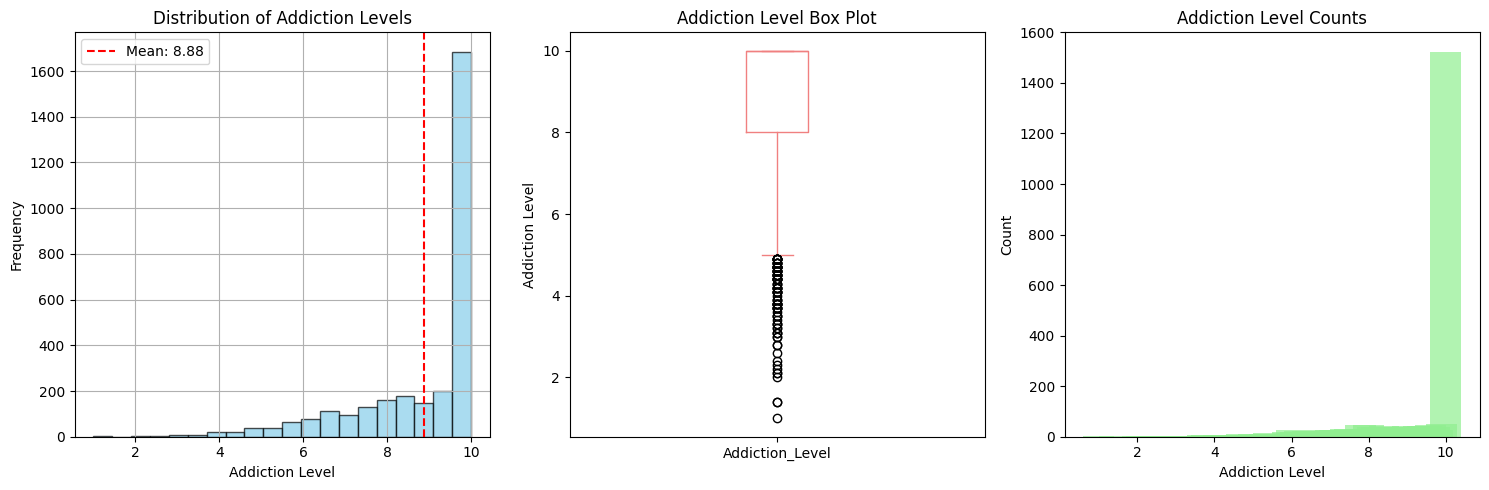


🎯 Binary Classification Target Created:
   Threshold (median): 10.0
   Low Addiction (0): 1476 samples
   High Addiction (1): 1524 samples
   Class Balance: 50.8% positive class


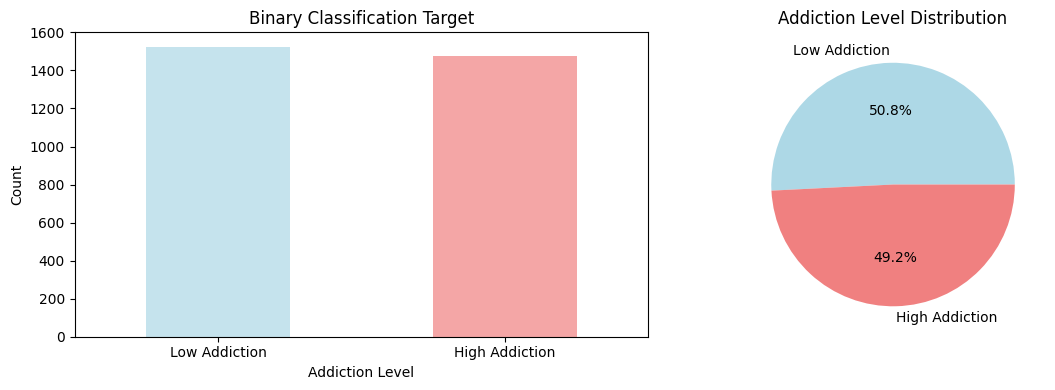

✅ Target variable created successfully!


In [6]:
# Display addiction level distribution
print("📊 Analyzing Addiction Level Distribution...")
print(df['Addiction_Level'].value_counts().sort_index())

# Create visualizations for target variable
plt.figure(figsize=(15, 5))

# Histogram of addiction levels
plt.subplot(1, 3, 1)
df['Addiction_Level'].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Addiction Levels')
plt.xlabel('Addiction Level')
plt.ylabel('Frequency')
plt.axvline(df['Addiction_Level'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["Addiction_Level"].mean():.2f}')
plt.legend()

# Box plot
plt.subplot(1, 3, 2)
df['Addiction_Level'].plot(kind='box', color='lightcoral')
plt.title('Addiction Level Box Plot')
plt.ylabel('Addiction Level')

# Bar chart of addiction levels
plt.subplot(1, 3, 3)
addiction_counts = df['Addiction_Level'].value_counts().sort_index()
plt.bar(addiction_counts.index, addiction_counts.values, color='lightgreen', alpha=0.7)
plt.title('Addiction Level Counts')
plt.xlabel('Addiction Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create binary classification target
threshold = df['Addiction_Level'].median()
df['High_Addiction'] = (df['Addiction_Level'] >= threshold).astype(int)

print(f"\n🎯 Binary Classification Target Created:")
print(f"   Threshold (median): {threshold}")
print(f"   Low Addiction (0): {(df['High_Addiction'] == 0).sum()} samples")
print(f"   High Addiction (1): {(df['High_Addiction'] == 1).sum()} samples")
print(f"   Class Balance: {(df['High_Addiction'] == 1).mean():.1%} positive class")

# Visualize binary target
target_counts = df['High_Addiction'].value_counts()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['High_Addiction'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'], alpha=0.7)
plt.title('Binary Classification Target')
plt.xlabel('Addiction Level')
plt.ylabel('Count')
plt.xticks([0, 1], ['Low Addiction', 'High Addiction'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['High_Addiction'].value_counts().values, 
        labels=['Low Addiction', 'High Addiction'], 
        colors=['lightblue', 'lightcoral'], 
        autopct='%1.1f%%')
plt.title('Addiction Level Distribution')

plt.tight_layout()
plt.show()

print(f"✅ Target variable created successfully!")

🛠️ Preprocessing Features for SVM...
📋 Feature Categories:
   Removed features: ['ID', 'Name', 'Location', 'Addiction_Level']
   Categorical features: ['Gender', 'School_Grade', 'Phone_Usage_Purpose']
   Numerical features: ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'High_Addiction']

📊 Feature Matrix Shape: (3000, 19)
🎯 Target Vector Shape: (3000,)

🔍 Key Features for Analysis: ['Daily_Usage_Hours', 'Phone_Checks_Per_Day', 'Time_on_Social_Media', 'Academic_Performance', 'Sleep_Hours', 'Anxiety_Level']


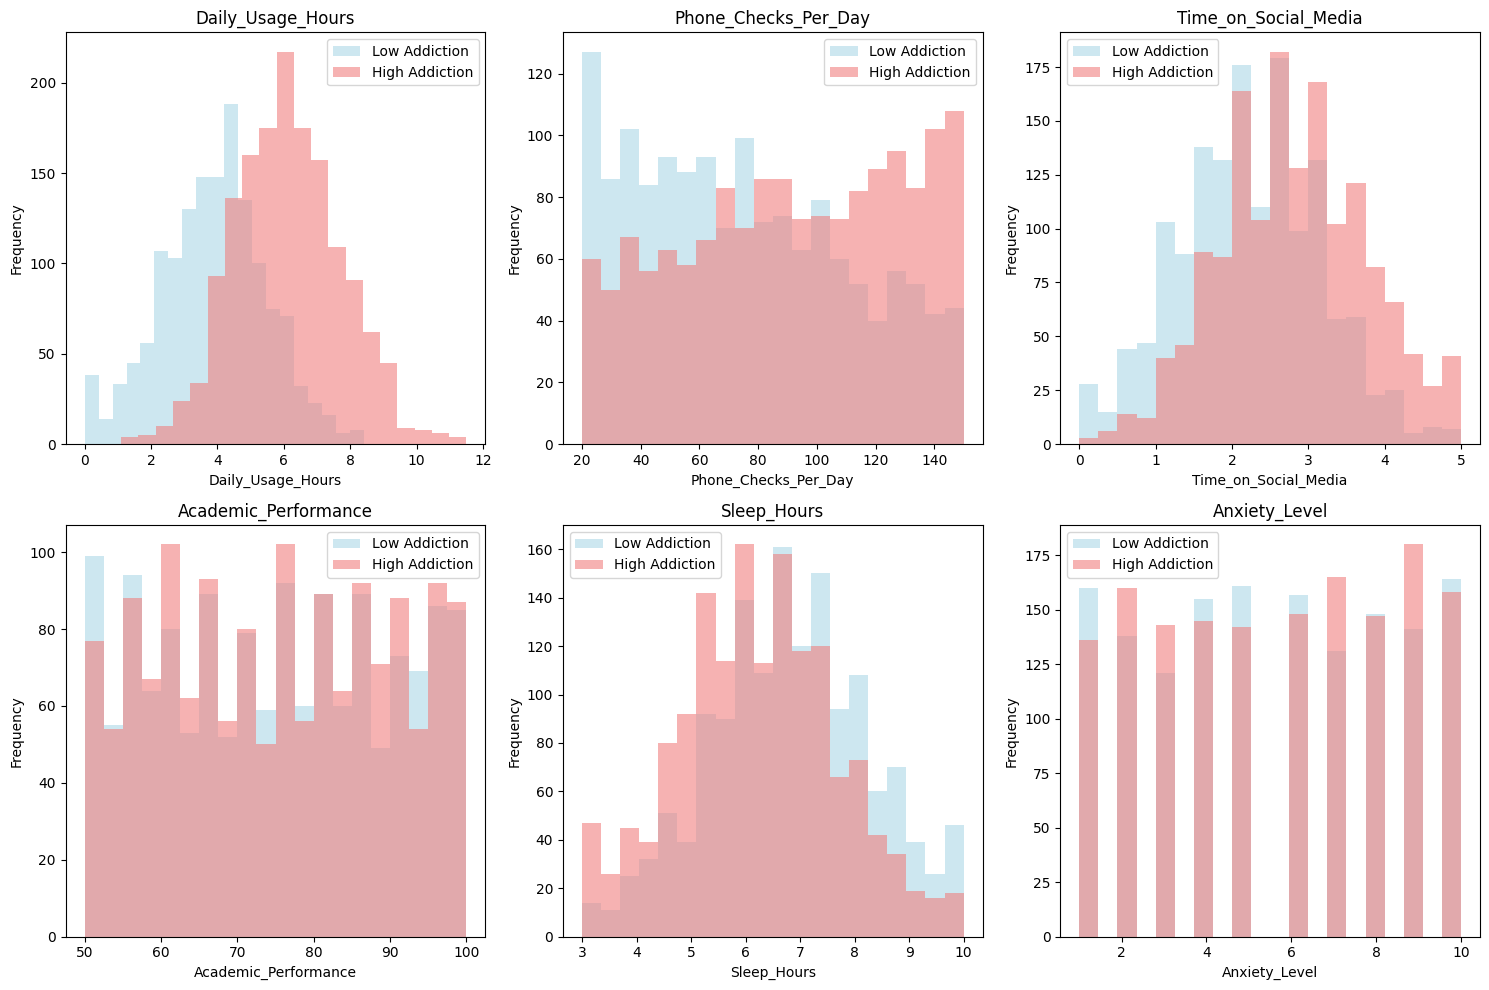

⚖️ Standardizing features (essential for SVM)...
✅ Features standardized successfully!
   Mean after scaling: -0.000
   Std after scaling: 1.000


In [7]:
# Feature preprocessing for SVM
print("🛠️ Preprocessing Features for SVM...")

# Remove non-predictive features
features_to_remove = ['ID', 'Name', 'Location', 'Addiction_Level']
categorical_features = ['Gender', 'School_Grade', 'Phone_Usage_Purpose']

# Get numerical features
numerical_features = [col for col in df.columns if col not in features_to_remove + categorical_features]

print(f"📋 Feature Categories:")
print(f"   Removed features: {features_to_remove}")
print(f"   Categorical features: {categorical_features}")
print(f"   Numerical features: {numerical_features}")

# Select numerical features and target
X_numerical = df[numerical_features].copy()
y = df['High_Addiction'].copy()

print(f"\n📊 Feature Matrix Shape: {X_numerical.shape}")
print(f"🎯 Target Vector Shape: {y.shape}")

# Analyze key features for visualization
key_features = ['Daily_Usage_Hours', 'Phone_Checks_Per_Day', 'Time_on_Social_Media', 
                'Academic_Performance', 'Sleep_Hours', 'Anxiety_Level']

print(f"\n🔍 Key Features for Analysis: {key_features[:6]}")

# Visualize feature distributions by class
plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features[:6]):
    plt.subplot(2, 3, i+1)
    
    low_addiction = df[df['High_Addiction'] == 0][feature]
    high_addiction = df[df['High_Addiction'] == 1][feature]
    
    plt.hist(low_addiction, alpha=0.6, label='Low Addiction', color='lightblue', bins=20)
    plt.hist(high_addiction, alpha=0.6, label='High Addiction', color='lightcoral', bins=20)
    plt.title(f'{feature}')
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature standardization (essential for SVM)
print("⚖️ Standardizing features (essential for SVM)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

print(f"✅ Features standardized successfully!")
print(f"   Mean after scaling: {X_scaled.mean().mean():.3f}")
print(f"   Std after scaling: {X_scaled.std().mean():.3f}")

## 3️⃣ Understanding SVM Hyperplanes and Decision Boundaries

Now we'll explore the core concept of SVMs: finding the optimal hyperplane that separates classes with maximum margin. We'll visualize this concept in 2D to understand how SVMs make decisions.

### **🔍 Key SVM Concepts:**
1. **Hyperplane**: Decision boundary that separates classes (line in 2D, plane in 3D, etc.)
2. **Support Vectors**: Data points closest to the decision boundary
3. **Margin**: Distance between the hyperplane and nearest data points
4. **Maximum Margin**: SVM objective to maximize this distance

### **📊 2D Visualization Strategy:**
- **Feature Selection**: Use the two most correlated features with target
- **Decision Boundary**: Show how different algorithms draw boundaries
- **Support Vectors**: Highlight the critical data points
- **Confidence Regions**: Understand prediction certainty

### **⚖️ Why This Matters:**
Understanding hyperplanes in 2D helps us grasp how SVMs work in higher dimensions, even though we can't visualize them directly.

🎯 Preparing Data for SVM Training...
📊 Data Split Summary:
   Training set: 2100 samples (70.0%)
   Test set: 900 samples (30.0%)
   Features: 18

🏆 Top 2 Most Correlated Features:
   1. Daily_Usage_Hours: 0.574
   2. Time_on_Social_Media: 0.299

📊 2D Dataset for Visualization:
   Features: ['Daily_Usage_Hours', 'Time_on_Social_Media']
   Training shape: (2100, 2)
   Test shape: (900, 2)


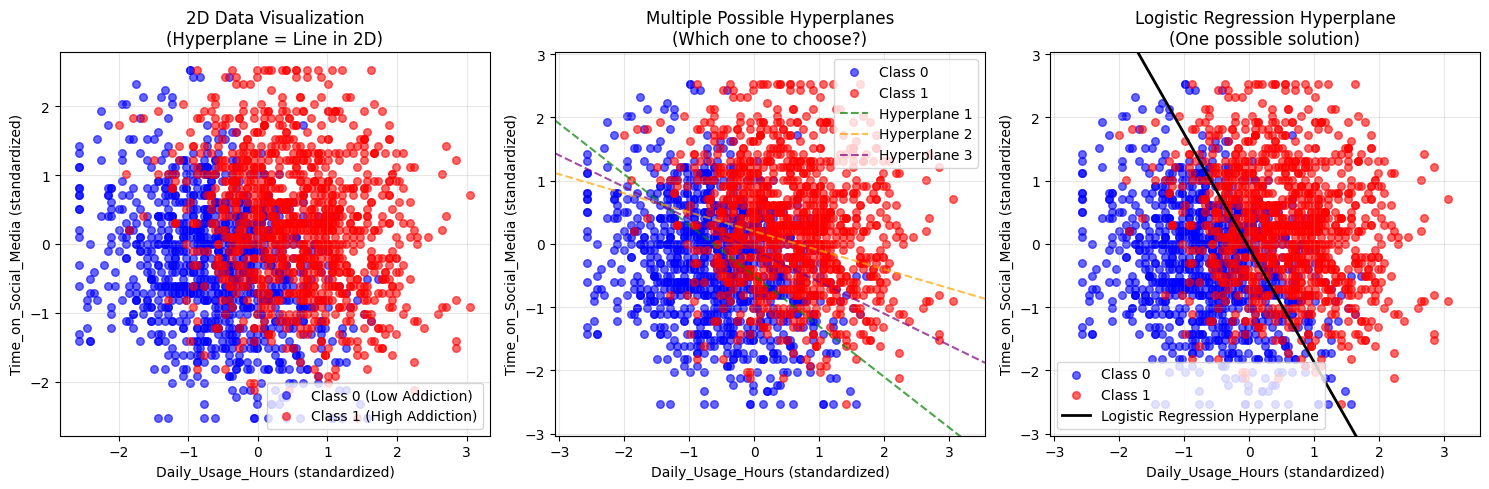

In [9]:
# Prepare data for SVM analysis
print("🎯 Preparing Data for SVM Training...")

# Clean numerical features (remove target if present)
numerical_features_clean = [col for col in numerical_features if col != 'High_Addiction']
X_clean = X_scaled[numerical_features_clean].copy()

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.3, random_state=42, stratify=y
)

print(f"📊 Data Split Summary:")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_clean)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_clean)*100:.1f}%)")
print(f"   Features: {X_train.shape[1]}")

# Feature importance analysis for 2D visualization
feature_importance = X_clean.corrwith(y).abs().sort_values(ascending=False)
top_features = feature_importance.head(2).index.tolist()

print(f"\n🏆 Top 2 Most Correlated Features:")
for i, feature in enumerate(top_features, 1):
    correlation = feature_importance[feature]
    print(f"   {i}. {feature}: {correlation:.3f}")

# Create 2D dataset for visualization
X_2d = X_train[top_features].values
X_2d_test = X_test[top_features].values

print(f"\n📊 2D Dataset for Visualization:")
print(f"   Features: {top_features}")
print(f"   Training shape: {X_2d.shape}")
print(f"   Test shape: {X_2d_test.shape}")

# Visualize the 2D data
plt.figure(figsize=(15, 5))

# Raw data visualization
plt.subplot(1, 3, 1)
colors = ['blue', 'red']
for i, class_label in enumerate([0, 1]):
    mask = y_train == class_label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.6, s=30,
               label=f'Class {class_label} ({"Low" if class_label==0 else "High"} Addiction)')

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('2D Data Visualization\n(Hyperplane = Line in 2D)')
plt.legend()
plt.grid(True, alpha=0.3)

# Multiple possible hyperplanes
plt.subplot(1, 3, 2)
for i, class_label in enumerate([0, 1]):
    mask = y_train == class_label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.6, s=30,
               label=f'Class {class_label}')

x_range = np.linspace(X_2d[:, 0].min()-0.5, X_2d[:, 0].max()+0.5, 100)

# Draw several possible separating lines
line1 = -0.5 - 0.8*x_range
line2 = 0.2 - 0.3*x_range
line3 = -0.1 - 0.5*x_range

plt.plot(x_range, line1, '--', color='green', alpha=0.7, label='Hyperplane 1')
plt.plot(x_range, line2, '--', color='orange', alpha=0.7, label='Hyperplane 2')
plt.plot(x_range, line3, '--', color='purple', alpha=0.7, label='Hyperplane 3')

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('Multiple Possible Hyperplanes\n(Which one to choose?)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(X_2d[:, 0].min()-0.5, X_2d[:, 0].max()+0.5)
plt.ylim(X_2d[:, 1].min()-0.5, X_2d[:, 1].max()+0.5)

# Logistic regression hyperplane for comparison
plt.subplot(1, 3, 3)
for i, class_label in enumerate([0, 1]):
    mask = y_train == class_label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.6, s=30,
               label=f'Class {class_label}')

# Train logistic regression for comparison
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_2d, y_train)

beta0 = log_reg.intercept_[0]
beta1, beta2 = log_reg.coef_[0]

if abs(beta2) > 1e-6:
    hyperplane_line = -(beta0 + beta1*x_range) / beta2
    plt.plot(x_range, hyperplane_line, 'k-', linewidth=2, 
             label=f'Logistic Regression Hyperplane')

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('Logistic Regression Hyperplane\n(One possible solution)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(X_2d[:, 0].min()-0.5, X_2d[:, 0].max()+0.5)
plt.ylim(X_2d[:, 1].min()-0.5, X_2d[:, 1].max()+0.5)

plt.tight_layout()
plt.show()

🧠 Analyzing Hyperplane Decision Making...
📊 Logistic Regression Performance (2D):
   Accuracy: 0.796 (79.6%)
   Decision values range: -6.779 to 7.924


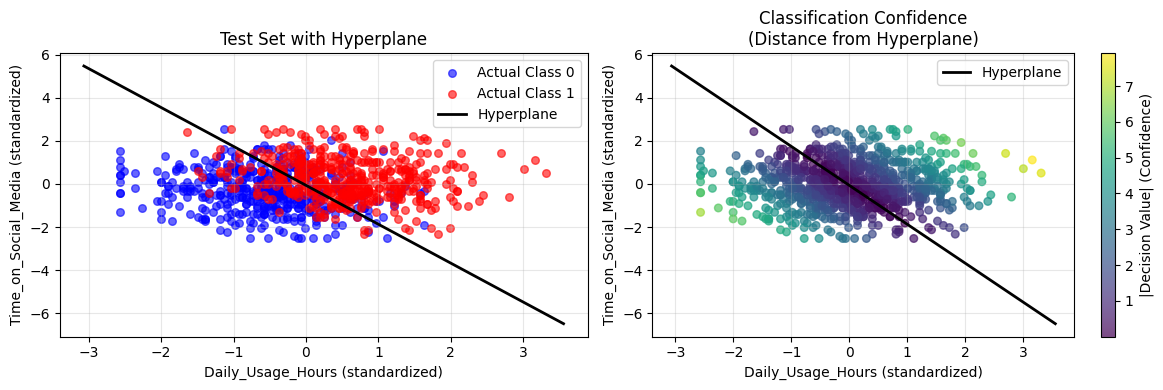

In [11]:
# Demonstrate hyperplane decision making
print("🧠 Analyzing Hyperplane Decision Making...")

# Make predictions and analyze decision confidence
predictions_2d = log_reg.predict(X_2d_test)
decision_values = log_reg.decision_function(X_2d_test)

# Calculate accuracy
accuracy_2d = accuracy_score(y_test, predictions_2d)
print(f"📊 Logistic Regression Performance (2D):")
print(f"   Accuracy: {accuracy_2d:.3f} ({accuracy_2d*100:.1f}%)")
print(f"   Decision values range: {decision_values.min():.3f} to {decision_values.max():.3f}")

# Visualize test predictions and confidence
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for i, class_label in enumerate([0, 1]):
    mask = y_test == class_label
    plt.scatter(X_2d_test[mask, 0], X_2d_test[mask, 1], 
               c=colors[i], alpha=0.6, s=30,
               label=f'Actual Class {class_label}')

if abs(beta2) > 1e-6:
    hyperplane_line = -(beta0 + beta1*x_range) / beta2
    plt.plot(x_range, hyperplane_line, 'k-', linewidth=2, label='Hyperplane')

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('Test Set with Hyperplane')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_2d_test[:, 0], X_2d_test[:, 1], 
                     c=np.abs(decision_values), cmap='viridis', 
                     s=30, alpha=0.7)
plt.colorbar(scatter, label='|Decision Value| (Confidence)')

if abs(beta2) > 1e-6:
    plt.plot(x_range, hyperplane_line, 'k-', linewidth=2, label='Hyperplane')

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('Classification Confidence\n(Distance from Hyperplane)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4️⃣ Hard vs Soft Margin SVMs

Real-world data is rarely perfectly separable, which is where SVMs truly shine. We'll explore the difference between hard margin (requires perfect separation) and soft margin (allows some misclassification) SVMs.

### **🎯 Key Concepts:**
1. **Hard Margin SVM**: Requires perfect linear separation (rarely possible)
2. **Soft Margin SVM**: Allows controlled misclassification through slack variables
3. **C Parameter**: Controls the trade-off between margin size and classification errors
4. **Slack Variables (ξ)**: Measure how much each point violates the margin

### **⚖️ The C Parameter Trade-off:**
- **High C**: Strict classification, small margin, potential overfitting
- **Low C**: Relaxed classification, large margin, potential underfitting
- **Optimal C**: Balance between margin size and classification accuracy

### **📊 What We'll Demonstrate:**
- Why hard margin fails on real data
- How soft margin handles overlapping classes
- Effect of C parameter on decision boundaries
- Support vector identification and analysis

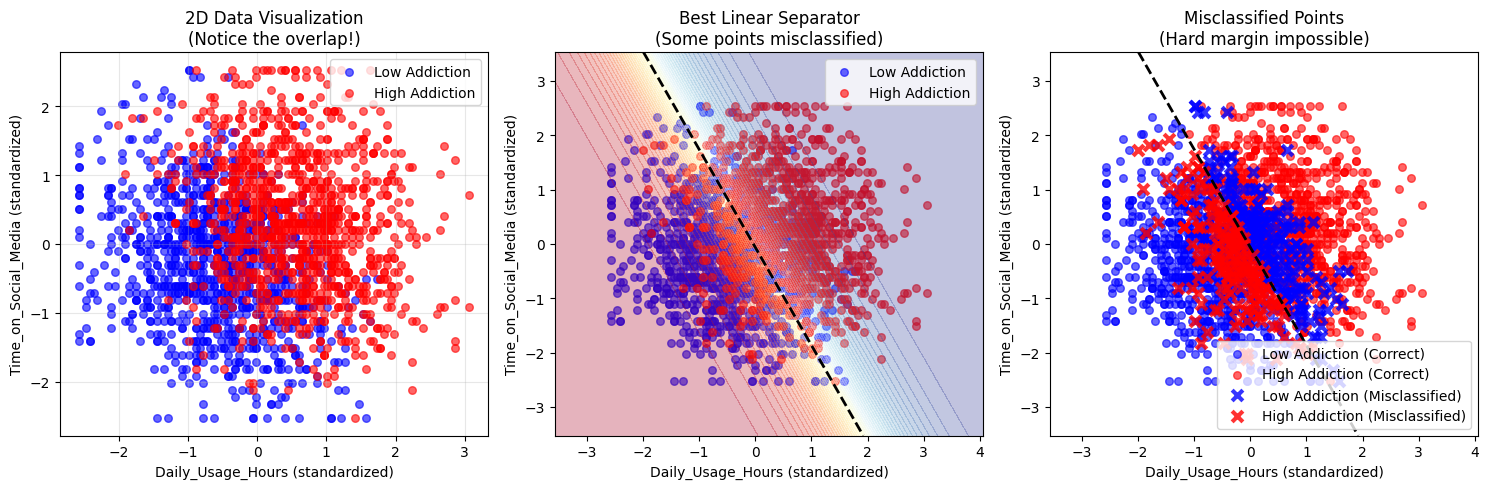

📊 Data Separability Analysis:
   Best linear accuracy: 0.802 (80.2%)
   Misclassified points: 415 out of 2100 (19.8%)
   ❌ Classes are NOT perfectly linearly separable
   ✅ Soft margin SVM needed!


In [12]:
# Check if classes are linearly separable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors = ['blue', 'red']
class_names = ['Low Addiction', 'High Addiction']

for i, class_label in enumerate([0, 1]):
    mask = y_train == class_label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.6, s=30, label=class_names[i])

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('2D Data Visualization\n(Notice the overlap!)')
plt.legend()
plt.grid(True, alpha=0.3)

# Try to find the best linear separator
plt.subplot(1, 3, 2)

for i, class_label in enumerate([0, 1]):
    mask = y_train == class_label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.6, s=30, label=class_names[i])

# Train logistic regression to find best linear boundary
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_2d, y_train)

# Create decision boundary visualization
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
plt.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap='RdYlBu')

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('Best Linear Separator\n(Some points misclassified)')
plt.legend()

# Identify misclassified points
plt.subplot(1, 3, 3)

predictions = log_reg.predict(X_2d)
correct_mask = predictions == y_train

# Plot correctly classified points
for i, class_label in enumerate([0, 1]):
    mask = (y_train == class_label) & correct_mask
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.6, s=30, label=f'{class_names[i]} (Correct)')

# Plot misclassified points
for i, class_label in enumerate([0, 1]):
    mask = (y_train == class_label) & (~correct_mask)
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], alpha=0.8, s=60, marker='x', linewidth=3,
               label=f'{class_names[i]} (Misclassified)')

plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)

plt.xlabel(f'{top_features[0]} (standardized)')
plt.ylabel(f'{top_features[1]} (standardized)')
plt.title('Misclassified Points\n(Hard margin impossible)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate separability metrics
accuracy = accuracy_score(y_train, predictions)
n_misclassified = np.sum(~correct_mask)

print(f"📊 Data Separability Analysis:")
print(f"   Best linear accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"   Misclassified points: {n_misclassified} out of {len(y_train)} ({n_misclassified/len(y_train)*100:.1f}%)")
print(f"   ❌ Classes are NOT perfectly linearly separable")
print(f"   ✅ Soft margin SVM needed!")

⚖️ Analyzing C Parameter Effects...
C Value  Train Acc  Support Vectors  Overfitting Risk
-------------------------------------------------------
0.0      0.804      1174             Low
0.1      0.802      995              Low
1.0      0.802      968              Low
10.0     0.802      963              Low
100.0    0.802      963              Low
1000.0   0.802      963              Low


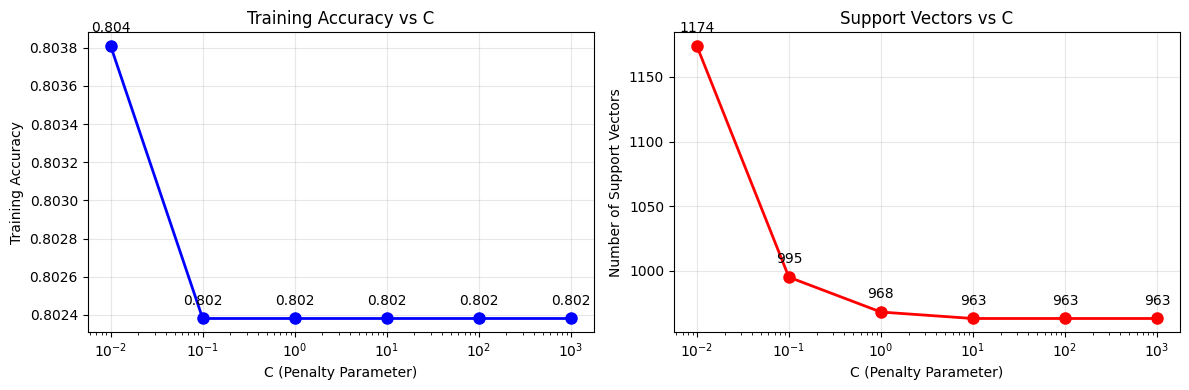


🎯 Key Insights:
   Higher C → More complex model, fewer support vectors
   Lower C → Simpler model, more support vectors
   Optimal C balances complexity and generalization

🎯 Outlier Analysis:
   Top 5 outliers (farthest from class center):
   1. Point 1569: distance 3.112, class 0
   2. Point 867: distance 2.963, class 1
   3. Point 1921: distance 2.953, class 1
   4. Point 52: distance 2.931, class 1
   5. Point 583: distance 2.927, class 1
✅ C parameter analysis complete!


In [15]:
# Demonstrate effect of C parameter on SVM performance
print("⚖️ Analyzing C Parameter Effects...")

# Test different C values
C_values = [0.01,0.1, 1.0, 10.0, 100.0, 1000.0]
results = []

print(f"{'C Value':<8} {'Train Acc':<10} {'Support Vectors':<16} {'Overfitting Risk'}")
print("-" * 55)

for C in C_values:
    # Train soft margin SVM
    soft_svm = SVC(kernel='linear', C=C, random_state=42)
    soft_svm.fit(X_2d, y_train)
    
    train_acc = accuracy_score(y_train, soft_svm.predict(X_2d))
    n_sv = len(soft_svm.support_vectors_)
    
    # Assess overfitting risk
    if train_acc > 0.95:
        risk = "High"
    elif train_acc > 0.90:
        risk = "Medium"
    else:
        risk = "Low"
    
    results.append((C, train_acc, n_sv))
    print(f"{C:<8.1f} {train_acc:<10.3f} {n_sv:<16} {risk}")

# Visualize C parameter effects
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
C_vals, train_accs, n_svs = zip(*results)
plt.semilogx(C_vals, train_accs, 'bo-', linewidth=2, markersize=8)
plt.xlabel('C (Penalty Parameter)')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs C')
plt.grid(True, alpha=0.3)

# Add annotations
for C, acc in zip(C_vals, train_accs):
    plt.annotate(f'{acc:.3f}', (C, acc), textcoords="offset points", 
                xytext=(0,10), ha='center')

plt.subplot(1, 2, 2)
plt.semilogx(C_vals, n_svs, 'ro-', linewidth=2, markersize=8)
plt.xlabel('C (Penalty Parameter)')
plt.ylabel('Number of Support Vectors')
plt.title('Support Vectors vs C')
plt.grid(True, alpha=0.3)

# Add annotations
for C, n_sv in zip(C_vals, n_svs):
    plt.annotate(f'{n_sv}', (C, n_sv), textcoords="offset points", 
                xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Insights:")
print(f"   Higher C → More complex model, fewer support vectors")
print(f"   Lower C → Simpler model, more support vectors")
print(f"   Optimal C balances complexity and generalization")

# Identify potential outliers for analysis
class_centers = {}
for class_label in [0, 1]:
    mask = y_train == class_label
    class_centers[class_label] = np.mean(X_2d[mask], axis=0)

distances = []
for i, (point, label) in enumerate(zip(X_2d, y_train)):
    dist = np.linalg.norm(point - class_centers[label])
    distances.append((i, dist, label))

distances.sort(key=lambda x: x[1], reverse=True)

print(f"\n🎯 Outlier Analysis:")
print(f"   Top 5 outliers (farthest from class center):")
for i in range(5):
    idx, dist, label = distances[i]
    print(f"   {i+1}. Point {idx}: distance {dist:.3f}, class {label}")

print(f"✅ C parameter analysis complete!")

## 5️⃣ Support Vector Analysis and Slack Variables

Understanding support vectors and slack variables is crucial for interpreting SVM decisions. These concepts help us understand which data points are most important for the decision boundary and how the model handles misclassified points.

### **🎯 Key Concepts:**
1. **Support Vectors**: Data points that lie on or within the margin
2. **Slack Variables (ξᵢ)**: Measure constraint violations for each point
3. **Margin Violations**: Points that fall within the margin but are correctly classified
4. **Misclassifications**: Points with slack variables ≥ 1

### **📊 Slack Variable Interpretation:**
- **ξᵢ = 0**: Point outside margin (correctly classified with confidence)
- **0 < ξᵢ < 1**: Point inside margin but correctly classified
- **ξᵢ ≥ 1**: Point is misclassified

### **🔍 What We'll Analyze:**
- Support vector identification and visualization
- Slack variable distribution across the dataset
- Relationship between C parameter and margin violations
- Decision boundary stability with different hyperparameters

🔍 Analyzing Support Vectors and Slack Variables...
📊 Support Vector Analysis (C = 1.0):
   Total support vectors: 968
   Correct margin (ξ = 0): 1133 points
   Margin violations (0 < ξ < 1): 552 points
   Misclassified (ξ ≥ 1): 415 points

📈 Slack Variable Statistics:
   Mean slack: 0.458
   Max slack: 4.009
   Points with slack > 0: 967 (46.0%)


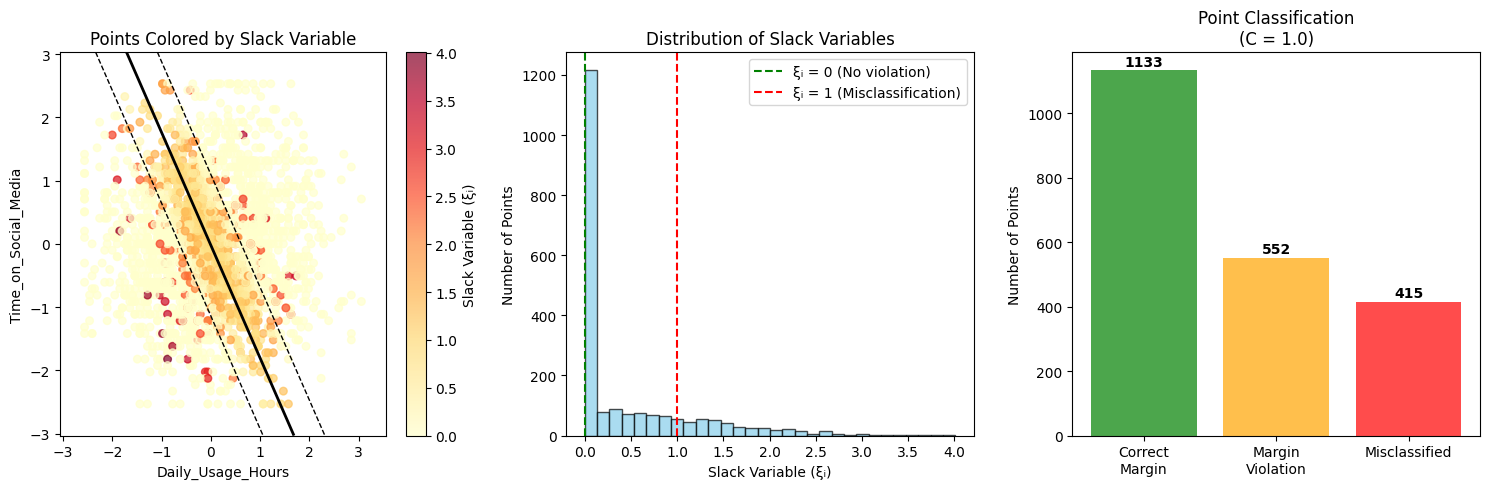

✅ Support vector analysis complete!


In [16]:
# Analyze support vectors and slack variables in detail
print("🔍 Analyzing Support Vectors and Slack Variables...")

# Train SVM with optimal C value for detailed analysis
C_selected = 1.0
svm_selected = SVC(kernel='linear', C=C_selected, random_state=42)
svm_selected.fit(X_2d, y_train)

# Get decision function values (distances from hyperplane)
decision_values = svm_selected.decision_function(X_2d)

# Convert target to {-1, +1} for slack variable calculation
y_train_svm = 2 * y_train - 1

# Calculate slack variables: ξᵢ = max(0, 1 - yᵢ * f(xᵢ))
slack_variables = np.maximum(0, 1 - y_train_svm * decision_values)

# Categorize points based on slack variables
correct_margin = np.sum(slack_variables == 0)
margin_violations = np.sum((slack_variables > 0) & (slack_variables < 1))
misclassified = np.sum(slack_variables >= 1)

print(f"📊 Support Vector Analysis (C = {C_selected}):")
print(f"   Total support vectors: {len(svm_selected.support_vectors_)}")
print(f"   Correct margin (ξ = 0): {correct_margin} points")
print(f"   Margin violations (0 < ξ < 1): {margin_violations} points")
print(f"   Misclassified (ξ ≥ 1): {misclassified} points")

# Detailed breakdown
print(f"\n📈 Slack Variable Statistics:")
print(f"   Mean slack: {slack_variables.mean():.3f}")
print(f"   Max slack: {slack_variables.max():.3f}")
print(f"   Points with slack > 0: {np.sum(slack_variables > 0)} ({np.sum(slack_variables > 0)/len(slack_variables)*100:.1f}%)")

# Visualize support vectors and slack variables
plt.figure(figsize=(15, 5))

# Plot 1: Points colored by slack variable
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=slack_variables, 
                     cmap='YlOrRd', s=30, alpha=0.7)
plt.colorbar(scatter, label='Slack Variable (ξᵢ)')

# Draw decision boundary and margins
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
Z = svm_selected.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', 
           linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

plt.xlabel(f'{top_features[0]}')
plt.ylabel(f'{top_features[1]}')
plt.title('Points Colored by Slack Variable')

# Plot 2: Histogram of slack variables
plt.subplot(1, 3, 2)
plt.hist(slack_variables, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='green', linestyle='--', label='ξᵢ = 0 (No violation)')
plt.axvline(x=1, color='red', linestyle='--', label='ξᵢ = 1 (Misclassification)')
plt.xlabel('Slack Variable (ξᵢ)')
plt.ylabel('Number of Points')
plt.title('Distribution of Slack Variables')
plt.legend()

# Plot 3: Categorized points
plt.subplot(1, 3, 3)
categories = ['Correct\nMargin', 'Margin\nViolation', 'Misclassified']
counts = [correct_margin, margin_violations, misclassified]
colors = ['green', 'orange', 'red']
bars = plt.bar(categories, counts, color=colors, alpha=0.7)

for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.ylabel('Number of Points')
plt.title(f'Point Classification\n(C = {C_selected})')

plt.tight_layout()
plt.show()

print(f"✅ Support vector analysis complete!")

🎯 Finding Optimal C Parameter through Cross-Validation...
Testing 13 different C values...
   C = 0.001: CV Score = 0.805 (±0.013)
   C = 0.032: CV Score = 0.802 (±0.013)
   C = 1.000: CV Score = 0.801 (±0.014)
   C = 31.623: CV Score = 0.800 (±0.013)
   C = 1000.000: CV Score = 0.800 (±0.013)

🏆 Optimal Hyperparameters Found:
   Best C: 0.001
   Best CV Score: 0.805
   Improvement over C=1.0: +0.4%


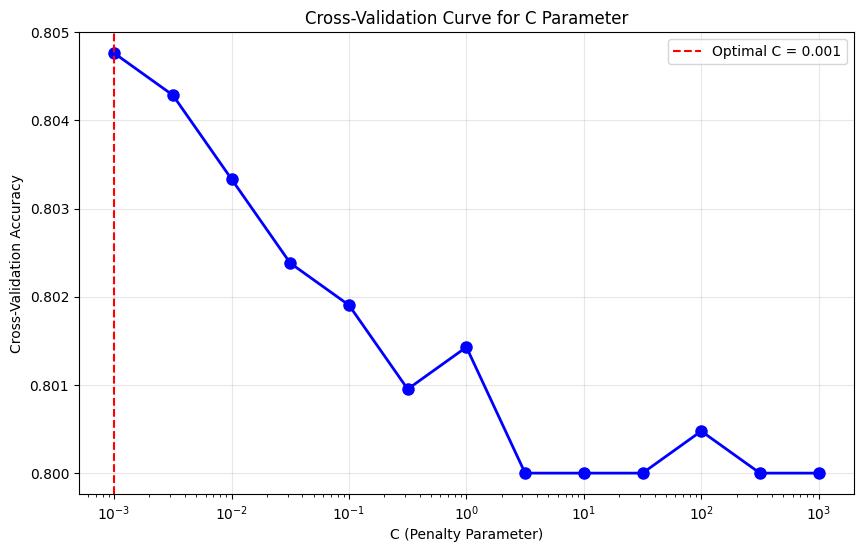


📊 Final Model Performance:
   Training Accuracy: 0.802
   Test Accuracy: 0.802
   Generalization Gap: +0.000
   Support Vectors: 1742
✅ Hyperparameter optimization complete!


In [18]:
# Cross-validation for optimal C parameter selection
print("🎯 Finding Optimal C Parameter through Cross-Validation...")

# Test wider range of C values
C_range = np.logspace(-3, 3, 13)  # From 0.001 to 1000
cv_scores = []

print(f"Testing {len(C_range)} different C values...")

for i, C in enumerate(C_range):
    svm = SVC(kernel='linear', C=C, random_state=42)
    scores = cross_val_score(svm, X_2d, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    if i % 3 == 0:  # Print progress every 3rd iteration
        print(f"   C = {C:.3f}: CV Score = {scores.mean():.3f} (±{scores.std():.3f})")

# Find optimal C
optimal_idx = np.argmax(cv_scores)
optimal_C = C_range[optimal_idx]
optimal_score = cv_scores[optimal_idx]

print(f"\n🏆 Optimal Hyperparameters Found:")
print(f"   Best C: {optimal_C:.3f}")
print(f"   Best CV Score: {optimal_score:.3f}")
print(f"   Improvement over C=1.0: {((optimal_score - cv_scores[6])/cv_scores[6]*100):+.1f}%")

# Visualize cross-validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(C_range, cv_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=optimal_C, color='red', linestyle='--', 
           label=f'Optimal C = {optimal_C:.3f}')
plt.xlabel('C (Penalty Parameter)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Curve for C Parameter')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Train final model with optimal parameters
final_svm = SVC(kernel='linear', C=optimal_C, random_state=42)
final_svm.fit(X_2d, y_train)

final_train_acc = accuracy_score(y_train, final_svm.predict(X_2d))
final_test_acc = accuracy_score(y_test, final_svm.predict(X_2d_test))

print(f"\n📊 Final Model Performance:")
print(f"   Training Accuracy: {final_train_acc:.3f}")
print(f"   Test Accuracy: {final_test_acc:.3f}")
print(f"   Generalization Gap: {final_train_acc - final_test_acc:+.3f}")
print(f"   Support Vectors: {len(final_svm.support_vectors_)}")

print(f"✅ Hyperparameter optimization complete!")

## 6️⃣ Kernel Methods: Beyond Linear Boundaries

Linear SVMs work well when data is linearly separable, but real-world problems often require more complex decision boundaries. Kernel methods allow SVMs to find non-linear patterns by implicitly mapping data to higher-dimensional spaces.

### **🌟 Kernel Types We'll Explore:**
1. **Linear Kernel**: K(x,y) = x^T y (what we've been using)
2. **Polynomial Kernel**: K(x,y) = (γx^T y + r)^d (polynomial boundaries)
3. **RBF (Gaussian) Kernel**: K(x,y) = exp(-γ||x-y||²) (radial boundaries)
4. **Sigmoid Kernel**: K(x,y) = tanh(γx^T y + r) (neural network-like)

### **🎯 Key Kernel Parameters:**
- **γ (gamma)**: Controls kernel width/flexibility
  - High γ: More complex, tighter fit (potential overfitting)
  - Low γ: Smoother, more general fit (potential underfitting)
- **degree**: For polynomial kernels (2, 3, 4, etc.)
- **coef0**: Independent term for polynomial/sigmoid kernels

### **📊 What We'll Demonstrate:**
- Performance comparison across different kernels
- Effect of gamma parameter on RBF kernels
- Overfitting detection with different kernel parameters
- 2D visualization of non-linear decision boundaries

In [22]:
# Compare different kernel types on full feature set
print("🌟 Exploring Different Kernel Methods...")

# Use full feature set for comprehensive comparison
X_full_train = X_train.values
X_full_test = X_test.values

# Define kernels to test
kernels = {
    'Linear': {'kernel': 'linear'},
    'Polynomial (degree=2)': {'kernel': 'poly', 'degree': 2, 'gamma': 'scale'},
    'Polynomial (degree=3)': {'kernel': 'poly', 'degree': 3, 'gamma': 'scale'},
    'RBF (γ=scale)': {'kernel': 'rbf', 'gamma': 'scale'},
    'RBF (γ=0.1)': {'kernel': 'rbf', 'gamma': 0.1},
    'RBF (γ=1.0)': {'kernel': 'rbf', 'gamma': 1.0}
}

kernel_results = {}
import time

print(f"{'Kernel':<25} {'Train Acc':<10} {'Test Acc':<10} {'Overfitting':<12} {'Time (s)'}")
print("-" * 70)

for kernel_name, kernel_params in kernels.items():
    start_time = time.time()
    
    # Train SVM with specific kernel
    svm = SVC(C=1.0, random_state=42, **kernel_params)
    svm.fit(X_full_train, y_train)
    
    # Make predictions
    train_pred = svm.predict(X_full_train)
    test_pred = svm.predict(X_full_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    n_support = len(svm.support_vectors_)
    training_time = time.time() - start_time
    overfitting = train_acc - test_acc
    
    kernel_results[kernel_name] = {
        'model': svm,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'n_support': n_support,
        'time': training_time
    }
    
    print(f"{kernel_name:<25} {train_acc:<10.3f} {test_acc:<10.3f} {overfitting:>+8.3f}    {training_time:>7.2f}")

# Find best performing kernel
best_kernel = max(kernel_results.keys(), key=lambda k: kernel_results[k]['test_acc'])
best_result = kernel_results[best_kernel]

print(f"\n🏆 Best Performing Kernel: {best_kernel}")
print(f"   Test Accuracy: {best_result['test_acc']:.3f}")
print(f"   Support Vectors: {best_result['n_support']}")
print(f"   Training Time: {best_result['time']:.2f}s")

🌟 Exploring Different Kernel Methods...
Kernel                    Train Acc  Test Acc   Overfitting  Time (s)
----------------------------------------------------------------------
Linear                    0.995      0.983        +0.011       0.02
Polynomial (degree=2)     0.615      0.489        +0.126       0.10
Polynomial (degree=3)     0.989      0.930        +0.059       0.05
RBF (γ=scale)             0.993      0.952        +0.041       0.08
RBF (γ=0.1)               0.999      0.940        +0.059       0.11
RBF (γ=1.0)               1.000      0.509        +0.491       0.25

🏆 Best Performing Kernel: Linear
   Test Accuracy: 0.983
   Support Vectors: 167
   Training Time: 0.02s


🔬 Deep Dive into RBF Kernel Performance...
Gamma    Train Acc  Test Acc   Gap      Overfitting
--------------------------------------------------
0.001    0.975      0.972      +0.003  🟢 Low
0.010    0.983      0.968      +0.016  🟢 Low
0.100    0.999      0.940      +0.059  🟡 Medium
1.000    1.000      0.509      +0.491  🔴 High
10.000   1.000      0.508      +0.492  🔴 High
100.000  1.000      0.508      +0.492  🔴 High


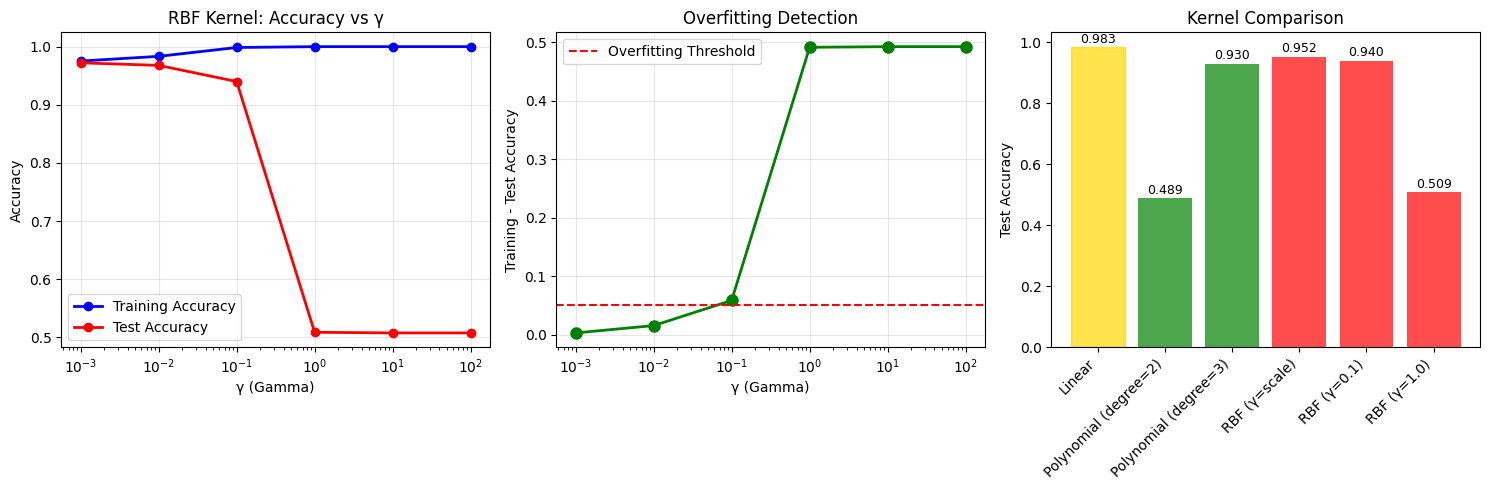


🎯 Key Insights:
   Low γ: Smooth decision boundaries, potential underfitting
   High γ: Complex decision boundaries, potential overfitting
   Optimal γ balances complexity and generalization


In [23]:
# Detailed analysis of RBF kernel with different gamma values
print("🔬 Deep Dive into RBF Kernel Performance...")

gamma_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
rbf_results = {}

print(f"{'Gamma':<8} {'Train Acc':<10} {'Test Acc':<10} {'Gap':<8} {'Overfitting'}")
print("-" * 50)

for gamma in gamma_values:
    svm = SVC(kernel='rbf', gamma=gamma, C=1.0, random_state=42)
    svm.fit(X_full_train, y_train)
    
    train_acc = accuracy_score(y_train, svm.predict(X_full_train))
    test_acc = accuracy_score(y_test, svm.predict(X_full_test))
    n_support = len(svm.support_vectors_)
    gap = train_acc - test_acc
    
    # Determine overfitting level
    if gap > 0.1:
        overfitting_level = "🔴 High"
    elif gap > 0.05:
        overfitting_level = "🟡 Medium"
    else:
        overfitting_level = "🟢 Low"
    
    rbf_results[gamma] = {
        'model': svm,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfitting': overfitting_level
    }
    
    print(f"{gamma:<8.3f} {train_acc:<10.3f} {test_acc:<10.3f} {gap:>+5.3f}  {overfitting_level}")

# Visualize gamma effects
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
gammas = list(rbf_results.keys())
train_accs = [rbf_results[g]['train_acc'] for g in gammas]
test_accs = [rbf_results[g]['test_acc'] for g in gammas]

plt.semilogx(gammas, train_accs, 'bo-', label='Training Accuracy', linewidth=2)
plt.semilogx(gammas, test_accs, 'ro-', label='Test Accuracy', linewidth=2)
plt.xlabel('γ (Gamma)')
plt.ylabel('Accuracy')
plt.title('RBF Kernel: Accuracy vs γ')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
overfitting_gap = np.array(train_accs) - np.array(test_accs)
plt.semilogx(gammas, overfitting_gap, 'go-', linewidth=2, markersize=8)
plt.axhline(y=0.05, color='red', linestyle='--', label='Overfitting Threshold')
plt.xlabel('γ (Gamma)')
plt.ylabel('Training - Test Accuracy')
plt.title('Overfitting Detection')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
kernel_names = list(kernel_results.keys())
test_accuracies = [kernel_results[k]['test_acc'] for k in kernel_names]

bars = plt.bar(range(len(kernel_names)), test_accuracies, alpha=0.7, 
               color=['blue', 'green', 'green', 'red', 'red', 'red'])
plt.xticks(range(len(kernel_names)), kernel_names, rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Kernel Comparison')

# Highlight best performer
best_idx = np.argmax(test_accuracies)
bars[best_idx].set_color('gold')

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, test_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Insights:")
print(f"   Low γ: Smooth decision boundaries, potential underfitting")
print(f"   High γ: Complex decision boundaries, potential overfitting")
print(f"   Optimal γ balances complexity and generalization")

🎨 Visualizing Kernel Decision Boundaries...


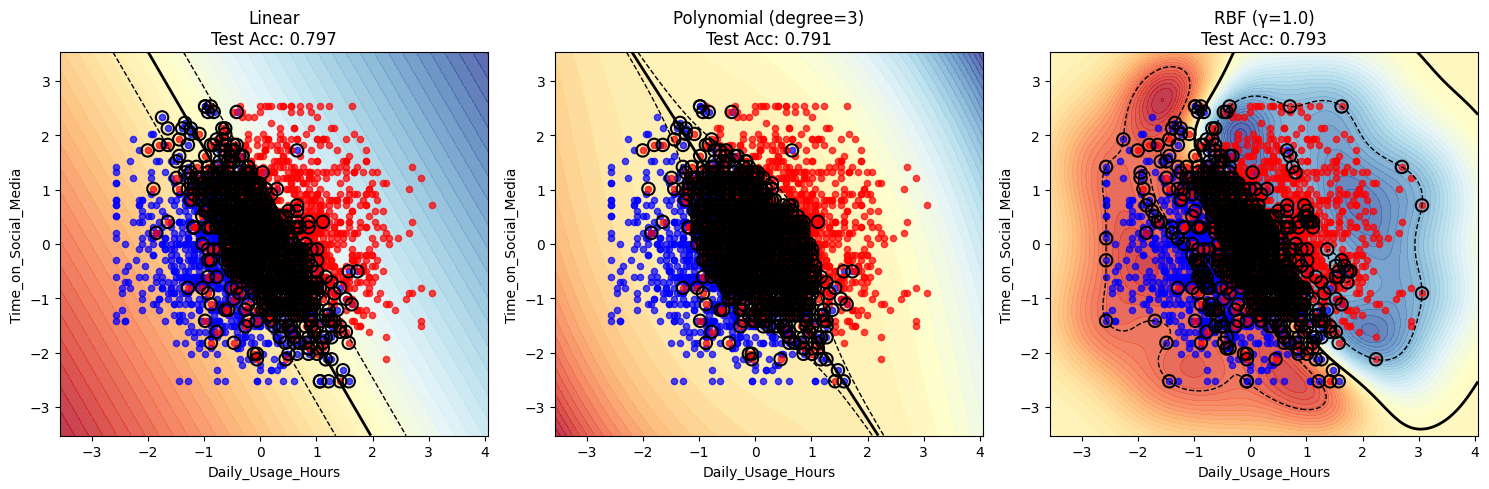

📊 Decision Boundary Analysis:
   Black circles: Support vectors
   Solid line: Decision boundary (hyperplane)
   Dashed lines: Margin boundaries
   Color regions: Confidence levels

🧠 Demonstrating the Kernel Trick:
   Original features: 2D
   Polynomial expansion (degree=3): 9D
   Feature expansion factor: 4.5x
   Kernel trick: SVM computes this implicitly!
✅ Kernel analysis complete!


In [24]:
# Visualize different kernel decision boundaries in 2D
print("🎨 Visualizing Kernel Decision Boundaries...")

# Use 2D data for clear visualization
X_2d = X_train[top_features].values
X_2d_test = X_test[top_features].values

# Select kernels for visualization
viz_kernels = {
    'Linear': {'kernel': 'linear'},
    'Polynomial (degree=3)': {'kernel': 'poly', 'degree': 3, 'gamma': 'scale'},
    'RBF (γ=1.0)': {'kernel': 'rbf', 'gamma': 1.0}
}

plt.figure(figsize=(15, 5))

for i, (kernel_name, kernel_params) in enumerate(viz_kernels.items()):
    plt.subplot(1, 3, i+1)
    
    # Train SVM with specific kernel
    svm = SVC(C=1.0, random_state=42, **kernel_params)
    svm.fit(X_2d, y_train)
    
    # Create meshgrid for decision boundary
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Get decision function values
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', 
               linestyles=['--', '-', '--'], linewidths=[1, 2, 1])
    
    # Plot data points
    colors = ['blue', 'red']
    for j, class_label in enumerate([0, 1]):
        mask = y_train == class_label
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
                   c=colors[j], alpha=0.7, s=20)
    
    # Highlight support vectors
    support_vectors = svm.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
               s=80, facecolors='none', edgecolors='black', linewidth=1.5)
    
    # Calculate test accuracy
    test_acc = accuracy_score(y_test, svm.predict(X_2d_test))
    
    plt.xlabel(f'{top_features[0]}')
    plt.ylabel(f'{top_features[1]}')
    plt.title(f'{kernel_name}\nTest Acc: {test_acc:.3f}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

print(f"📊 Decision Boundary Analysis:")
print(f"   Black circles: Support vectors")
print(f"   Solid line: Decision boundary (hyperplane)")
print(f"   Dashed lines: Margin boundaries")
print(f"   Color regions: Confidence levels")

# Demonstrate kernel trick concept
from sklearn.preprocessing import PolynomialFeatures

print(f"\n🧠 Demonstrating the Kernel Trick:")
print(f"   Original features: {X_2d.shape[1]}D")

# Show how polynomial features expand dimensionality
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_2d_expanded = poly_features.fit_transform(X_2d[:100])  # Use subset for demonstration

print(f"   Polynomial expansion (degree=3): {X_2d_expanded.shape[1]}D")
print(f"   Feature expansion factor: {X_2d_expanded.shape[1] / X_2d.shape[1]:.1f}x")
print(f"   Kernel trick: SVM computes this implicitly!")

print(f"✅ Kernel analysis complete!")

## 7️⃣ Multi-class Classification with SVMs

SVMs are naturally binary classifiers, but real-world problems often involve multiple classes. We'll explore two main strategies for extending SVMs to multi-class problems and compare their effectiveness.

### **🎯 Multi-class Strategies:**
1. **One-vs-One (OvO)**: Train C(C-1)/2 binary classifiers for C classes
2. **One-vs-All (OvA)**: Train C binary classifiers (each class vs. all others)

### **⚖️ Strategy Comparison:**
- **One-vs-One**:
  - ✅ Fewer samples per classifier
  - ✅ More balanced datasets
  - ❌ More classifiers needed
  - ❌ Voting can be ambiguous

- **One-vs-All**:
  - ✅ Fewer classifiers needed
  - ✅ Direct probability interpretation
  - ❌ Imbalanced datasets
  - ❌ All data needed for each classifier

### **🎨 Implementation Approach:**
- Create 4-class target from addiction levels (Low, Medium, High, Severe)
- Implement both strategies manually and with sklearn
- Compare performance, training time, and prediction consistency
- Analyze per-class performance metrics

🎯 Creating Multi-class Classification Problem...

📊 Addiction Category Distribution:
   Low     :   14 samples (  0.5%)
   Medium  :  221 samples (  7.4%)
   High    :  517 samples ( 17.2%)
   Severe  : 2248 samples ( 74.9%)

🎯 Limiting Severe class samples for better balance...
   Low     :   14 samples (  1.2%)
   Medium  :  221 samples ( 19.2%)
   High    :  517 samples ( 44.9%)
   Severe  :  400 samples ( 34.7%)

🏷️ Label Encoding:
   0: High
   1: Low
   2: Medium
   3: Severe

🎯 Class Balance Analysis:
   Most balanced ratio: 0.03

📊 For 4 classes, we need:
   One-vs-One: 6 = 6 binary classifiers
   One-vs-All: 4 = 4 binary classifiers


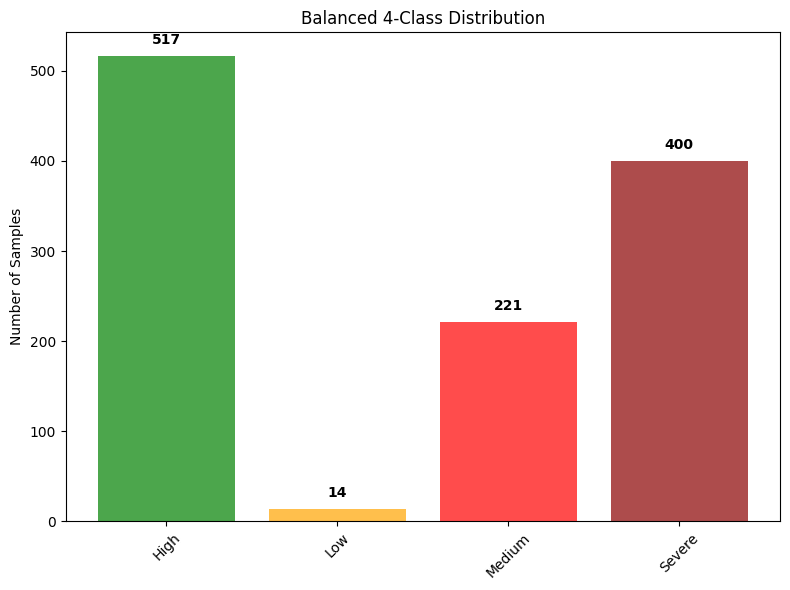

✅ 4-class target created successfully!


In [35]:
# Create multi-class target for demonstration
print("🎯 Creating Multi-class Classification Problem...")

# Create 4-class target using predefined bins
df_clean = df.copy()
df_clean['Addiction_Category'] = pd.cut(df_clean['Addiction_Level'], 
                                       bins=[0, 3, 6, 8, 10], 
                                       labels=['Low', 'Medium', 'High', 'Severe'])

print(f"\n📊 Addiction Category Distribution:")
addiction_counts_orig = df_clean['Addiction_Category'].value_counts().sort_index()
total_samples_orig = len(df_clean)

for category, count in addiction_counts_orig.items():
    percentage = (count / total_samples_orig) * 100
    print(f"   {category:8s}: {count:4d} samples ({percentage:5.1f}%)")

# Limit the Severe class to make it more balanced
print(f"\n🎯 Limiting Severe class samples for better balance...")

# Get all samples by category
low_samples = df_clean[df_clean['Addiction_Category'] == 'Low']
medium_samples = df_clean[df_clean['Addiction_Category'] == 'Medium'] 
high_samples = df_clean[df_clean['Addiction_Category'] == 'High']
severe_samples = df_clean[df_clean['Addiction_Category'] == 'Severe']

# Create balanced dataset by limiting Severe to 400 samples
np.random.seed(42)
severe_limited = severe_samples.sample(n=400, random_state=42)

# Combine all classes
df_balanced = pd.concat([low_samples, medium_samples, high_samples, severe_limited], ignore_index=True)

addiction_counts = df_balanced['Addiction_Category'].value_counts().sort_index()
total_samples = len(df_balanced)

for category, count in addiction_counts.items():
    percentage = (count / total_samples) * 100
    print(f"   {category:8s}: {count:4d} samples ({percentage:5.1f}%)")

# Convert to numeric labels for SVM
label_encoder = LabelEncoder()
y_multiclass = label_encoder.fit_transform(df_balanced['Addiction_Category'])
class_names = list(label_encoder.classes_)

print(f"\n🏷️ Label Encoding:")
for i, name in enumerate(class_names):
    print(f"   {i}: {name}")

# Prepare features from balanced dataset
features_to_remove = ['ID', 'Name', 'Location', 'Addiction_Level', 'Addiction_Category']
categorical_features = ['Gender', 'School_Grade', 'Phone_Usage_Purpose']
numerical_features = [col for col in df_balanced.columns if col not in features_to_remove + categorical_features]

X_balanced = df_balanced[numerical_features].copy()

# Scale the features
scaler_balanced = StandardScaler()
X_balanced_scaled = scaler_balanced.fit_transform(X_balanced)
X_balanced_scaled = pd.DataFrame(X_balanced_scaled, columns=numerical_features)

# Create train/test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_balanced_scaled, y_multiclass, test_size=0.3, random_state=42, stratify=y_multiclass
)

# Analyze class distribution
unique, counts = np.unique(y_multiclass, return_counts=True)

print(f"\n🎯 Class Balance Analysis:")
min_class = counts.min()
max_class = counts.max()
balance_ratio = min_class / max_class
print(f"   Most balanced ratio: {balance_ratio:.2f}")

print(f"\n📊 For 4 classes, we need:")
print(f"   One-vs-One: {4*(4-1)//2} = 6 binary classifiers")
print(f"   One-vs-All: {4} = 4 binary classifiers")

# Visualize balanced class distribution
plt.figure(figsize=(8, 6))
colors = ['green', 'orange', 'red', 'darkred']
bars = plt.bar(class_names, counts, color=colors, alpha=0.7)
plt.title('Balanced 4-Class Distribution')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"✅ 4-class target created successfully!")

In [36]:
# Implement One-vs-One strategy manually
print("🔧 Implementing One-vs-One Multi-class Strategy...")

from sklearn.svm import SVC
from collections import Counter

def one_vs_one_manual(X_train, y_train, X_test, kernel='rbf', C=1.0, gamma=0.1):
    """Manual implementation of One-vs-One strategy"""
    classes = np.unique(y_train)
    n_classes = len(classes)
    
    classifiers = {}
    
    print(f"   Training {n_classes*(n_classes-1)//2} binary classifiers...")
    
    # Train binary classifier for each pair of classes
    for i in range(n_classes):
        for j in range(i + 1, n_classes):
            class_i, class_j = classes[i], classes[j]
            
            # Extract samples for this pair
            mask = (y_train == class_i) | (y_train == class_j)
            X_pair = X_train[mask]
            y_pair = y_train[mask]
            
            # Convert to binary problem (0 vs 1)
            y_binary = (y_pair == class_j).astype(int)
            
            # Train binary SVM
            svm = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
            svm.fit(X_pair, y_binary)
            
            classifiers[(class_i, class_j)] = svm
            print(f"     Trained classifier for classes {class_names[class_i]} vs {class_names[class_j]}")
    
    # Make predictions using voting
    predictions = []
    
    print(f"   Making predictions using voting scheme...")
    for x in X_test:
        votes = Counter()
        
        # Get vote from each binary classifier
        for (class_i, class_j), clf in classifiers.items():
            pred = clf.predict(x.reshape(1, -1))[0]
            if pred == 0:
                votes[class_i] += 1
            else:
                votes[class_j] += 1
        
        # Predict class with most votes
        predicted_class = votes.most_common(1)[0][0]
        predictions.append(predicted_class)
    
    return np.array(predictions), classifiers

# Use full feature set for better performance
X_full_train = X_train_multi.values
X_full_test = X_test_multi.values

# Train One-vs-One manually
ovo_predictions, ovo_classifiers = one_vs_one_manual(
    X_full_train, y_train_multi, X_full_test, 
    kernel='rbf', C=1.0, gamma=0.1
)

ovo_accuracy = accuracy_score(y_test_multi, ovo_predictions)

print(f"\n📊 One-vs-One Results:")
print(f"   Number of binary classifiers: {len(ovo_classifiers)}")
print(f"   Test accuracy: {ovo_accuracy:.3f}")
print(f"   Total support vectors: {sum(len(clf.support_vectors_) for clf in ovo_classifiers.values())}")

🔧 Implementing One-vs-One Multi-class Strategy...
   Training 6 binary classifiers...
     Trained classifier for classes High vs Low
     Trained classifier for classes High vs Medium
     Trained classifier for classes High vs Severe
     Trained classifier for classes Low vs Medium
     Trained classifier for classes Low vs Severe
     Trained classifier for classes Medium vs Severe
   Making predictions using voting scheme...

📊 One-vs-One Results:
   Number of binary classifiers: 6
   Test accuracy: 0.757
   Total support vectors: 1641


In [37]:
# Implement One-vs-All strategy manually
print("🔧 Implementing One-vs-All Multi-class Strategy...")

def one_vs_all_manual(X_train, y_train, X_test, kernel='rbf', C=1.0, gamma=0.1):
    """Manual implementation of One-vs-All strategy"""
    classes = np.unique(y_train)
    classifiers = {}
    
    print(f"   Training {len(classes)} binary classifiers...")
    
    # Train one classifier per class
    for class_label in classes:
        # Create binary problem: current class vs all others
        y_binary = (y_train == class_label).astype(int)
        
        # Count positive and negative samples
        pos_samples = np.sum(y_binary == 1)
        neg_samples = np.sum(y_binary == 0)
        
        # Train binary SVM
        svm = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
        svm.fit(X_train, y_binary)
        
        classifiers[class_label] = svm
        print(f"     {class_names[class_label]} vs Others: {pos_samples} vs {neg_samples} samples")
    
    # Make predictions using confidence scores
    predictions = []
    
    print(f"   Making predictions using confidence scores...")
    for x in X_test:
        confidences = {}
        
        # Get confidence from each binary classifier
        for class_label, clf in classifiers.items():
            confidence = clf.decision_function(x.reshape(1, -1))[0]
            confidences[class_label] = confidence
        
        # Predict class with highest confidence
        predicted_class = max(confidences.keys(), key=lambda k: confidences[k])
        predictions.append(predicted_class)
    
    return np.array(predictions), classifiers

# Train One-vs-All manually
ova_predictions, ova_classifiers = one_vs_all_manual(
    X_full_train, y_train_multi, X_full_test,
    kernel='rbf', C=1.0, gamma=0.1
)

ova_accuracy = accuracy_score(y_test_multi, ova_predictions)

print(f"\n📊 One-vs-All Results:")
print(f"   Number of binary classifiers: {len(ova_classifiers)}")
print(f"   Test accuracy: {ova_accuracy:.3f}")
print(f"   Total support vectors: {sum(len(clf.support_vectors_) for clf in ova_classifiers.values())}")

🔧 Implementing One-vs-All Multi-class Strategy...
   Training 4 binary classifiers...
     High vs Others: 362 vs 444 samples
     Low vs Others: 10 vs 796 samples
     Medium vs Others: 154 vs 652 samples
     Severe vs Others: 280 vs 526 samples
   Making predictions using confidence scores...

📊 One-vs-All Results:
   Number of binary classifiers: 4
   Test accuracy: 0.757
   Total support vectors: 1849


In [38]:
# Compare with sklearn implementations
print("🔄 Comparing with Sklearn Implementations...")

# Sklearn One-vs-One and One-vs-All
sklearn_ovo = SVC(kernel='rbf', C=1.0, gamma=0.1, decision_function_shape='ovo', random_state=42)
sklearn_ova = SVC(kernel='rbf', C=1.0, gamma=0.1, decision_function_shape='ovr', random_state=42)

print("   Training sklearn implementations...")
sklearn_ovo.fit(X_full_train, y_train_multi)
sklearn_ova.fit(X_full_train, y_train_multi)

sklearn_ovo_pred = sklearn_ovo.predict(X_full_test)
sklearn_ova_pred = sklearn_ova.predict(X_full_test)

sklearn_ovo_acc = accuracy_score(y_test_multi, sklearn_ovo_pred)
sklearn_ova_acc = accuracy_score(y_test_multi, sklearn_ova_pred)

# Comprehensive comparison table
results_comparison = {
    'Method': ['Manual One-vs-One', 'Manual One-vs-All', 'Sklearn One-vs-One', 'Sklearn One-vs-All'],
    'Accuracy': [ovo_accuracy, ova_accuracy, sklearn_ovo_acc, sklearn_ova_acc],
    'Classifiers': [6, 4, '6 (internal)', '4 (internal)'],
    'Strategy': ['Voting', 'Max Confidence', 'Voting', 'Max Confidence']
}

print(f"\n📊 Comprehensive Comparison:")
print(f"{'Method':<20} {'Accuracy':<10} {'Classifiers':<12} {'Strategy'}")
print("-" * 60)

for i in range(len(results_comparison['Method'])):
    method = results_comparison['Method'][i]
    acc = results_comparison['Accuracy'][i]
    classifiers = results_comparison['Classifiers'][i]
    strategy = results_comparison['Strategy'][i]
    print(f"{method:<20} {acc:<10.3f} {classifiers:<12} {strategy}")

# Find best method
best_method_idx = np.argmax(results_comparison['Accuracy'])
best_method = results_comparison['Method'][best_method_idx]
best_accuracy = results_comparison['Accuracy'][best_method_idx]

print(f"\n🏆 Best Performing Method: {best_method}")
print(f"   Accuracy: {best_accuracy:.3f}")

# Use best method predictions for detailed analysis
if best_method_idx < 2:  # Manual implementation
    best_predictions = ovo_predictions if best_method_idx == 0 else ova_predictions
else:  # Sklearn implementation
    best_predictions = sklearn_ovo_pred if best_method_idx == 2 else sklearn_ova_pred

print(f"\n📊 Detailed Performance Analysis ({best_method}):")
print(classification_report(y_test_multi, best_predictions, target_names=class_names))

🔄 Comparing with Sklearn Implementations...
   Training sklearn implementations...

📊 Comprehensive Comparison:
Method               Accuracy   Classifiers  Strategy
------------------------------------------------------------
Manual One-vs-One    0.757      6            Voting
Manual One-vs-All    0.757      4            Max Confidence
Sklearn One-vs-One   0.757      6 (internal) Voting
Sklearn One-vs-All   0.757      4 (internal) Max Confidence

🏆 Best Performing Method: Manual One-vs-One
   Accuracy: 0.757

📊 Detailed Performance Analysis (Manual One-vs-One):
              precision    recall  f1-score   support

        High       0.67      0.95      0.79       155
         Low       0.00      0.00      0.00         4
      Medium       0.69      0.33      0.44        67
      Severe       0.99      0.77      0.86       120

    accuracy                           0.76       346
   macro avg       0.59      0.51      0.52       346
weighted avg       0.78      0.76      0.74       3

🎨 Creating Comprehensive Multi-class Analysis...


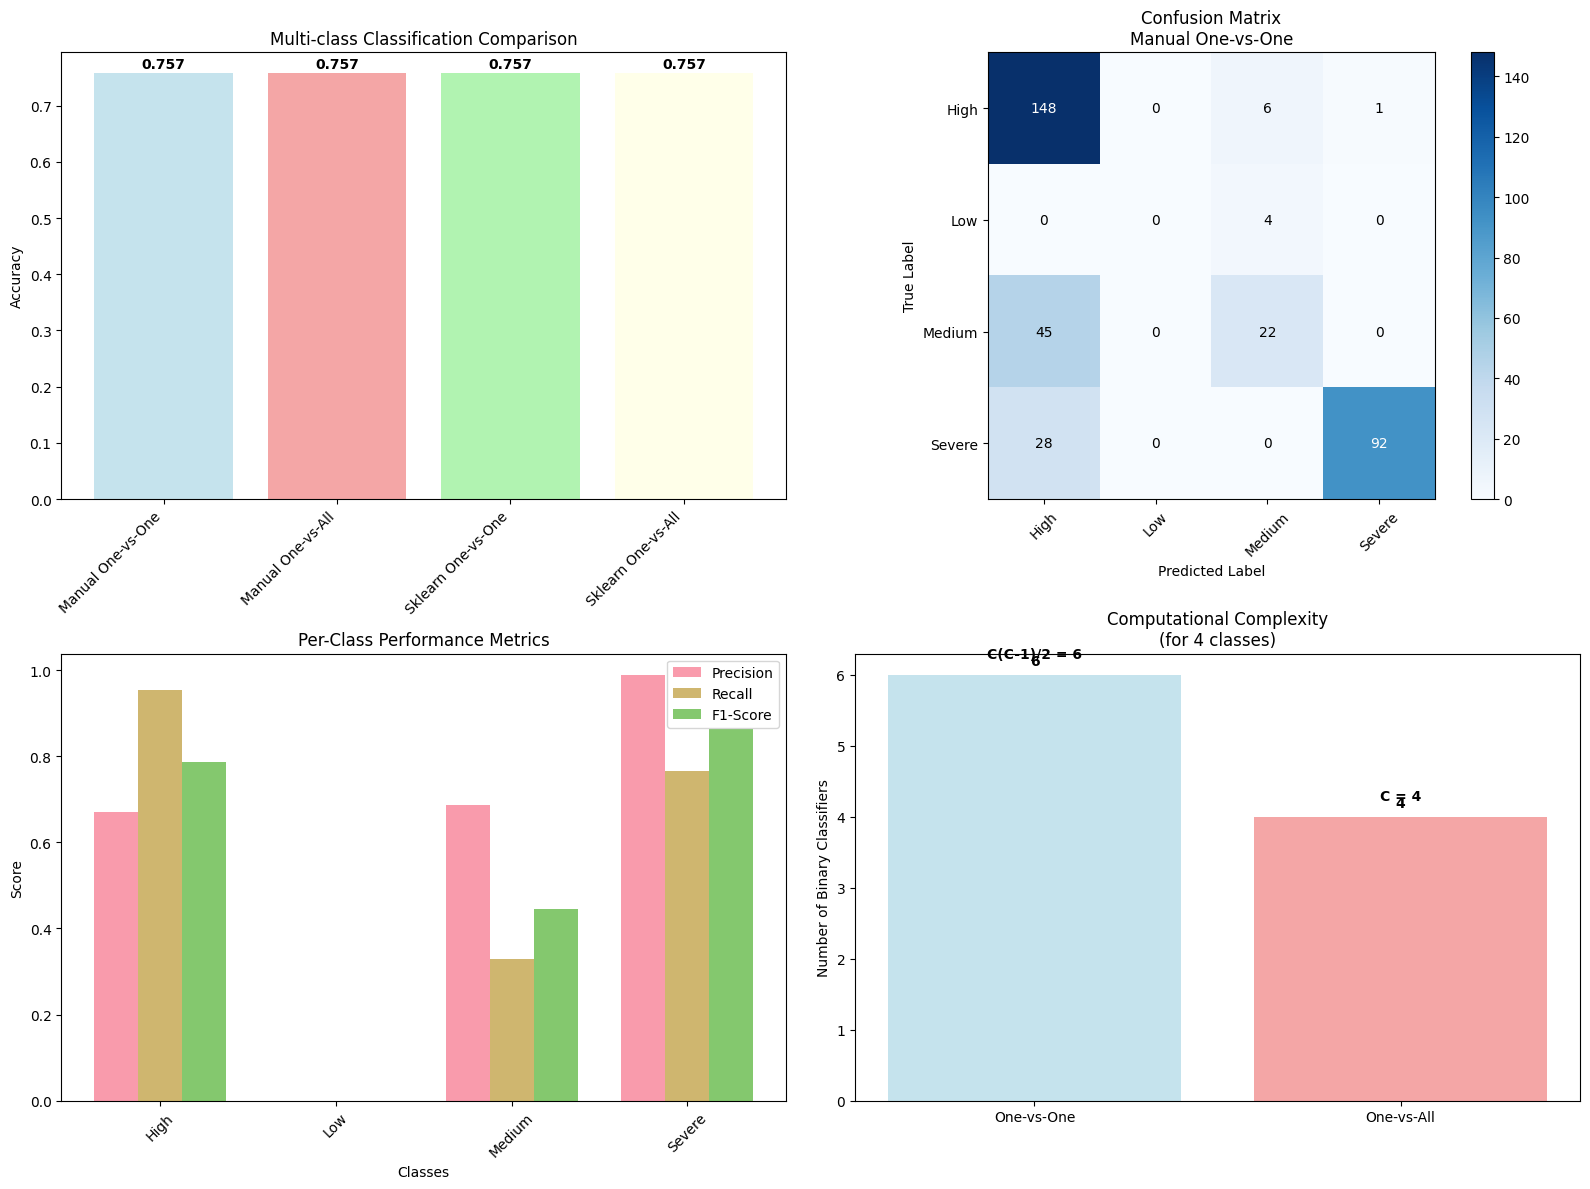


🎯 Key Insights from Multi-class Analysis:
   🏆 Best method: Manual One-vs-One (0.757 accuracy)
   📊 One-vs-One trains 6 classifiers, One-vs-All trains 4
   ⚖️ One-vs-All suffers from class imbalance
   🗳️ One-vs-One uses voting, which can handle ties better

📋 Per-Class Performance Summary:
   High    : P=0.670 R=0.955 F1=0.787 (n=155.0)
   Low     : P=0.000 R=0.000 F1=0.000 (n=4.0)
   Medium  : P=0.688 R=0.328 F1=0.444 (n=67.0)
   Severe  : P=0.989 R=0.767 F1=0.864 (n=120.0)

✅ Multi-class SVM analysis complete!


In [39]:
# Comprehensive visualization and analysis
print("🎨 Creating Comprehensive Multi-class Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Method comparison
methods = results_comparison['Method']
accuracies = results_comparison['Accuracy']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']

bars = axes[0, 0].bar(range(len(methods)), accuracies, color=colors, alpha=0.7)
axes[0, 0].set_xticks(range(len(methods)))
axes[0, 0].set_xticklabels(methods, rotation=45, ha='right')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Multi-class Classification Comparison')

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Confusion matrix for best method
cm = confusion_matrix(y_test_multi, best_predictions)
im = axes[0, 1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0, 1].set_title(f'Confusion Matrix\n{best_method}')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[0, 1])

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0, 1].text(j, i, format(cm[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")

axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')
tick_marks = np.arange(len(class_names))
axes[0, 1].set_xticks(tick_marks)
axes[0, 1].set_xticklabels(class_names, rotation=45)
axes[0, 1].set_yticks(tick_marks)
axes[0, 1].set_yticklabels(class_names)

# 3. Per-class performance metrics
from sklearn.metrics import classification_report

report = classification_report(y_test_multi, best_predictions, 
                             target_names=class_names, output_dict=True)

classes = class_names
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

x = np.arange(len(classes))
width = 0.25

axes[1, 0].bar(x - width, precision, width, label='Precision', alpha=0.7)
axes[1, 0].bar(x, recall, width, label='Recall', alpha=0.7)
axes[1, 0].bar(x + width, f1_score, width, label='F1-Score', alpha=0.7)

axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Per-Class Performance Metrics')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(classes, rotation=45)
axes[1, 0].legend()

# 4. Computational complexity comparison
methods_simple = ['One-vs-One', 'One-vs-All']
n_classifiers = [6, 4]  # For 4 classes
colors_simple = ['lightblue', 'lightcoral']

bars = axes[1, 1].bar(methods_simple, n_classifiers, color=colors_simple, alpha=0.7)
axes[1, 1].set_ylabel('Number of Binary Classifiers')
axes[1, 1].set_title('Computational Complexity\n(for 4 classes)')

# Add formulas
axes[1, 1].text(0, 6.2, 'C(C-1)/2 = 6', ha='center', va='bottom', fontweight='bold')
axes[1, 1].text(1, 4.2, 'C = 4', ha='center', va='bottom', fontweight='bold')

# Add value labels
for bar, count in zip(bars, n_classifiers):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n🎯 Key Insights from Multi-class Analysis:")
print(f"   🏆 Best method: {best_method} ({best_accuracy:.3f} accuracy)")
print(f"   📊 One-vs-One trains {6} classifiers, One-vs-All trains {4}")
print(f"   ⚖️ One-vs-All suffers from class imbalance")
print(f"   🗳️ One-vs-One uses voting, which can handle ties better")

# Performance by class
print(f"\n📋 Per-Class Performance Summary:")
for i, class_name in enumerate(class_names):
    if class_name in report:
        prec = report[class_name]['precision']
        rec = report[class_name]['recall']
        f1 = report[class_name]['f1-score']
        support = report[class_name]['support']
        print(f"   {class_name:8s}: P={prec:.3f} R={rec:.3f} F1={f1:.3f} (n={support})")

print(f"\n✅ Multi-class SVM analysis complete!")

### Contributed by: Ali Habibullah